In [11]:
pip install Faker;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.4 MB/s eta 0:00:00


In [12]:
from faker import Faker
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler




> Data Set Creation using Faker(Python)





In [13]:

fake = Faker()
match_data_list = []

num_matches = 1000
K_weight = 2  # Weight for kills
W_weight = 5  # Weight for wins

for match_id in range(num_matches):
    # Generate random data
    wins = np.random.randint(1, 10)
    loses = 10 - wins
    wl_ratio = wins / loses
    avg_kills = np.random.randint(0, 999)
    avg_deaths = np.random.randint(0, 999)
    avg_assists = np.random.randint(0, 555)
    avg_kdr = avg_kills / (avg_deaths + 1)  # Adding 1 to avoid division by zero

    # Introduce null values randomly in some columns
    if np.random.rand() < 0.1:  # 10% chance of having null values
        wins = None
    if np.random.rand() < 0.1:
        avg_kills = None
    if np.random.rand() < 0.05:  # 5% chance for additional columns
        avg_deaths = None
        avg_assists = None

    # Generate a random device type (e.g., 'PC', 'Console', 'Mobile')
    device_played = fake.random_element(elements=('PC', 'Console', 'Mobile'))

    # Calculate the score using Method 1, handle None values
    if avg_kills is not None and wins is not None:
        score = (avg_kills * K_weight) + (wins * W_weight)
    else:
        score = None

    match_data = {
        'Match_id': fake.building_number(),
        'Wins': wins,
        'Loses': loses,
        'WL_Ratio': wl_ratio,
        'Avg_Kills': avg_kills,
        'Avg_Deaths': avg_deaths,
        'Avg_Assists': avg_assists,
        'Avg_KDR': avg_kdr,
        'Device_Played': device_played,  # Include the new categorical feature
        'Score': score
    }

    match_data_list.append(match_data)

# Convert data to DataFrame
df = pd.DataFrame(match_data_list)

# Save to CSV
df.to_csv('Data_set.csv', index=False)

In [7]:
print("Head of the dataset:")
print(df.head())


Head of the dataset:
  Match_id  Wins  Loses  WL_Ratio  Avg_Kills  Avg_Deaths  Avg_Assists  \
0     5721   3.0      7  0.428571      954.0       533.0        107.0   
1    60736   9.0      1  9.000000      667.0       580.0         32.0   
2      400   6.0      4  1.500000      906.0       165.0        435.0   
3     7415   6.0      4  1.500000      376.0       386.0        360.0   
4     5129   NaN      3  2.333333      568.0       488.0        236.0   

    Avg_KDR Device_Played   Score  
0  1.786517            PC  1923.0  
1  1.148021            PC  1379.0  
2  5.457831            PC  1842.0  
3  0.971576            PC   782.0  
4  1.161554       Console     NaN  




> General Information About the Data Set




In [8]:
# Display general information about the dataset
print("\nGeneral information about the dataset:")
print(df.info())


General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Match_id       1000 non-null   object 
 1   Wins           888 non-null    float64
 2   Loses          1000 non-null   int64  
 3   WL_Ratio       1000 non-null   float64
 4   Avg_Kills      890 non-null    float64
 5   Avg_Deaths     966 non-null    float64
 6   Avg_Assists    966 non-null    float64
 7   Avg_KDR        1000 non-null   float64
 8   Device_Played  1000 non-null   object 
 9   Score          788 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 78.2+ KB
None




> Size of the Dataset



In [9]:
# Number of rows and columns
num_rows, num_columns = df.shape
print("\nNumber of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 1000
Number of columns: 10




> Types of Data Present in the Data set




In [10]:
# Data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Match_id          object
Wins             float64
Loses              int64
WL_Ratio         float64
Avg_Kills        float64
Avg_Deaths       float64
Avg_Assists      float64
Avg_KDR          float64
Device_Played     object
Score            float64
dtype: object




> Stats of Data



In [11]:
#for basic statistics of data set
df.describe()

,Wins,Loses,WL_Ratio,Avg_Kills,Avg_Deaths,Avg_Assists,Avg_KDR,Score
count,888.000000,1000.000000,1000.000000,890.000000,966.000000,966.000000,1000.000000,788.000000
mean,4.925676,5.058000,2.171810,489.316854,506.203934,290.051760,3.884649,997.397208
std,2.632101,2.627078,2.768090,276.380699,282.188598,159.412306,23.246085,553.789354
min,1.000000,1.000000,0.111111,4.000000,0.000000,0.000000,0.002762,24.000000
25%,3.000000,3.000000,0.428571,253.250000,264.500000,152.000000,0.475864,530.500000
50%,5.000000,5.000000,1.000000,487.000000,520.000000,295.500000,0.918367,999.000000
75%,7.000000,7.000000,2.333333,727.500000,747.000000,428.000000,1.816458,1474.500000
max,9.000000,9.000000,9.000000,998.000000,998.000000,554.000000,438.000000,2041.000000




> Checking whether the data set has null values or not



In [15]:
# Missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
Match_id           0
Wins             112
Loses              0
WL_Ratio           0
Avg_Kills        110
Avg_Deaths        34
Avg_Assists       34
Avg_KDR            0
Device_Played      0
Score            212
dtype: int64


In [12]:
#checking the data set whether it have any null values or null fields or not
df.isnull()

,Match_id,Wins,Loses,WL_Ratio,Avg_Kills,Avg_Deaths,Avg_Assists,Avg_KDR,Device_Played,Score
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,True,False,False,False,False,True
998,False,False,False,False,False,False,False,False,False,False




> Finding Mean, Median & Mode of Data set along with Null values




In [14]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' defined somewhere in your code

mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # Mode may return multiple values, so we take the first one

print("Mean Values of each Column:")
print(mean_values)
print("\n")

print("Median Values of each Column:")
print(median_values)
print("\n")

print("Mode Values of each Column:")
print(mode_values)



Mean Values of each Column:
Match_id              inf
Wins             4.925676
Loses            5.058000
WL_Ratio         2.171810
Avg_Kills      489.316854
Avg_Deaths     506.203934
Avg_Assists    290.051760
Avg_KDR          3.884649
Score          997.397208
dtype: float64


Median Values of each Column:
Match_id       4930.500000
Wins              5.000000
Loses             5.000000
WL_Ratio          1.000000
Avg_Kills       487.000000
Avg_Deaths      520.000000
Avg_Assists     295.500000
Avg_KDR           0.918367
Score           999.000000
dtype: float64


Mode Values of each Column:
Match_id              392
Wins                  3.0
Loses                 7.0
WL_Ratio         0.428571
Avg_Kills           158.0
Avg_Deaths           85.0
Avg_Assists          83.0
Avg_KDR              0.25
Device_Played          PC
Score               537.0
Name: 0, dtype: object


<ipython-input-14-e0c3425f383f>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()
<ipython-input-14-e0c3425f383f>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()





> **Null** **Values** **Imputation**



*   Using KNN
*   Using Mean







In [24]:

# Select the columns with missing values
columns_to_impute = ['Wins', 'Avg_Kills', 'Avg_Deaths']

# Create a subset DataFrame with the columns to impute and other relevant features
subset_df = df[['Loses', 'WL_Ratio', 'Avg_Assists', 'Avg_KDR', 'Score'] + columns_to_impute]

# Use KNNImputer to impute missing values in the selected columns
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(subset_df), columns=subset_df.columns)

# Update the original DataFrame with imputed values for the specified columns
df[columns_to_impute] = df_imputed[columns_to_impute]

# Display the DataFrame with imputed values
print(df)

    Match_id  Wins  Loses  WL_Ratio  Avg_Kills  Avg_Deaths  Avg_Assists  \
0       5721   3.0      7  0.428571      954.0       533.0        107.0   
1      60736   9.0      1  9.000000      667.0       580.0         32.0   
2        400   6.0      4  1.500000      906.0       165.0        435.0   
3       7415   6.0      4  1.500000      376.0       386.0        360.0   
4       5129   4.6      3  2.333333      568.0       488.0        236.0   
..       ...   ...    ...       ...        ...         ...          ...   
995      105   8.0      2  4.000000      582.0        15.0         23.0   
996      868   3.0      7  0.428571      400.0        83.0        524.0   
997     3644   9.0      1  9.000000      440.4       683.0        492.0   
998      772   7.0      3  2.333333      179.0       685.0        531.0   
999    36689   4.4      4  1.500000      314.0       674.0        308.0   

       Avg_KDR Device_Played   Score  
0     1.786517            PC  1923.0  
1     1.148021       



> Imputing Null Values using mentioned methods



In [32]:
#Imputing Avg_assists and Score features using Hot deck implementation

# Select the columns with missing values
columns_to_impute = ['Avg_Assists', 'Score']

# Create a subset DataFrame with the columns to impute
subset_df = df[columns_to_impute]

# Initialize SimpleImputer with a strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the selected columns
df[columns_to_impute] = imputer.fit_transform(subset_df)


In [61]:
df.isnull().sum()

Match_id                    0
Wins                        0
Loses                       0
WL_Ratio                    0
Avg_Kills                   0
Avg_Deaths                  0
Avg_Assists                 0
Avg_KDR                     0
Device_Played               0
Score                       0
Z_Score_Outlier             0
IQR_Outlier                 0
Isolation_Forest_Outlier    0
dtype: int64




> **Outlier Detection Using Z-Score Method**




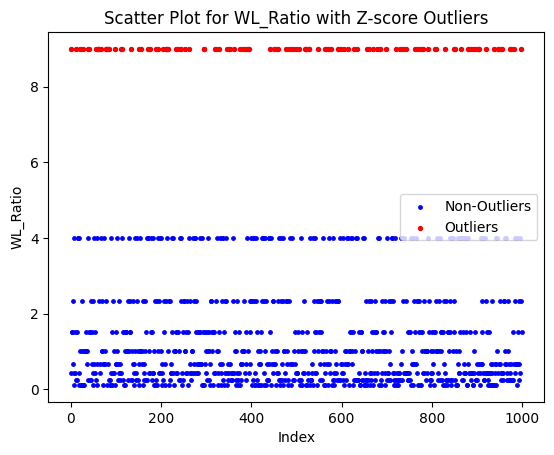

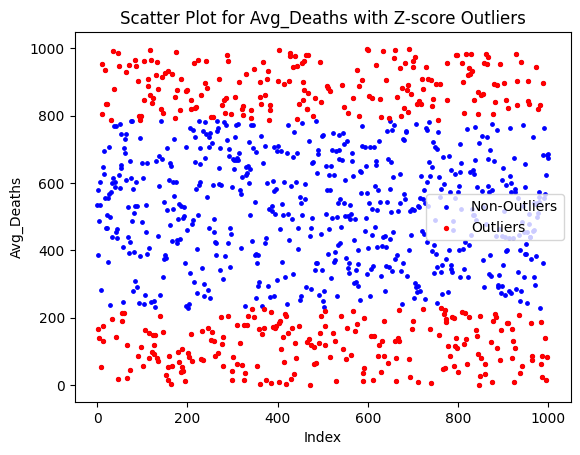

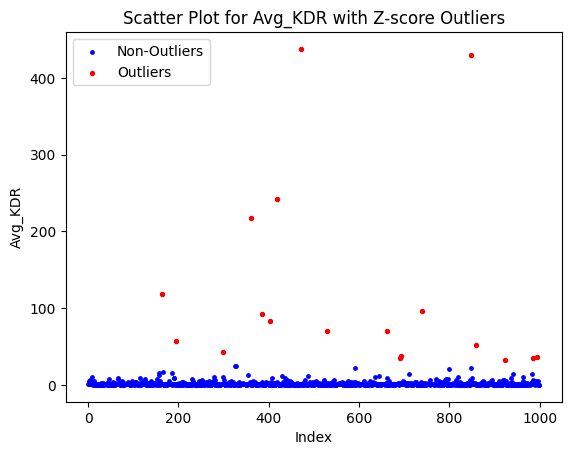

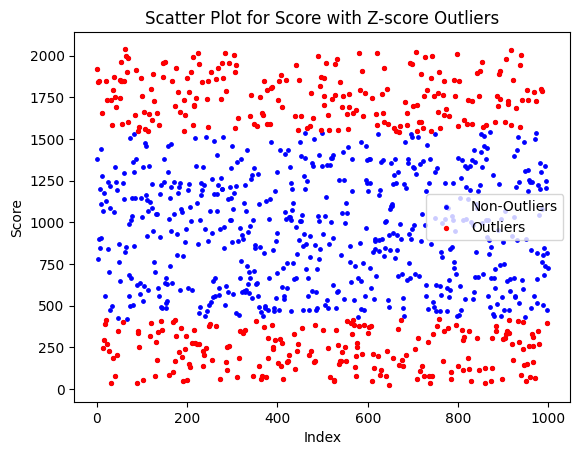

In [56]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'df' from your code

# Columns for Z-score Outlier Detection
z_score_columns = ['WL_Ratio', 'Avg_Deaths', 'Avg_KDR', 'Score']

# Define a threshold for considering a data point as an outlier
threshold = 1

# Identify outliers using the Z-score for each specified column
outliers_wl_ratio = df[abs(zscore(df['WL_Ratio'])) > threshold]
outliers_avg_deaths = df[abs(zscore(df['Avg_Deaths'])) > threshold]
outliers_avg_kdr = df[abs(zscore(df['Avg_KDR'])) > threshold]
outliers_score = df[abs(zscore(df['Score'])) > threshold]

# Function to create scatter plots
def create_scatter_plot(x, y, outliers, xlabel, ylabel, title):
    plt.scatter(df.index, df[y], c='blue', label='Non-Outliers', s=6)
    plt.scatter(outliers.index, outliers[y], c='red', label='Outliers', s=8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Scatter Plots with reduced sizes
create_scatter_plot('Index', 'WL_Ratio', outliers_wl_ratio, 'Index', 'WL_Ratio', 'Scatter Plot for WL_Ratio with Z-score Outliers')
create_scatter_plot('Index', 'Avg_Deaths', outliers_avg_deaths, 'Index', 'Avg_Deaths', 'Scatter Plot for Avg_Deaths with Z-score Outliers')
create_scatter_plot('Index', 'Avg_KDR', outliers_avg_kdr, 'Index', 'Avg_KDR', 'Scatter Plot for Avg_KDR with Z-score Outliers')
create_scatter_plot('Index', 'Score', outliers_score, 'Index', 'Score', 'Scatter Plot for Score with Z-score Outliers')





> After Removing Outliers from the data set



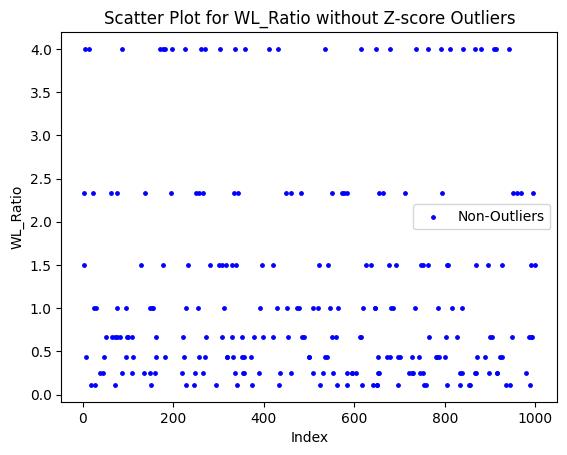

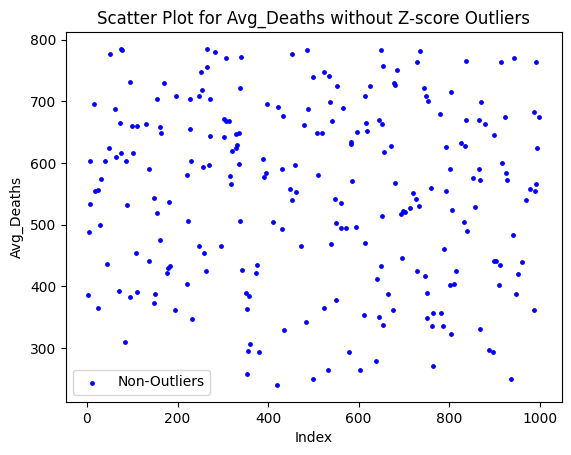

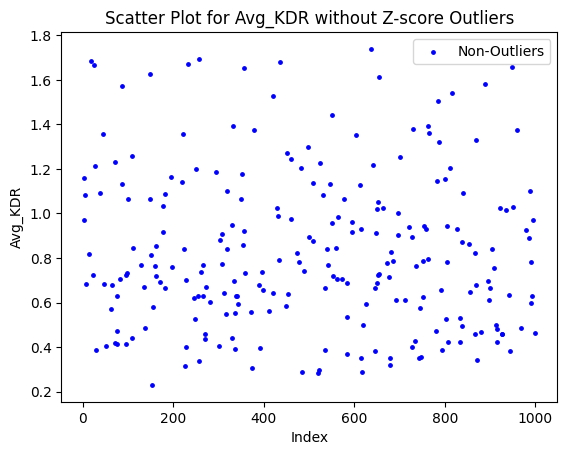

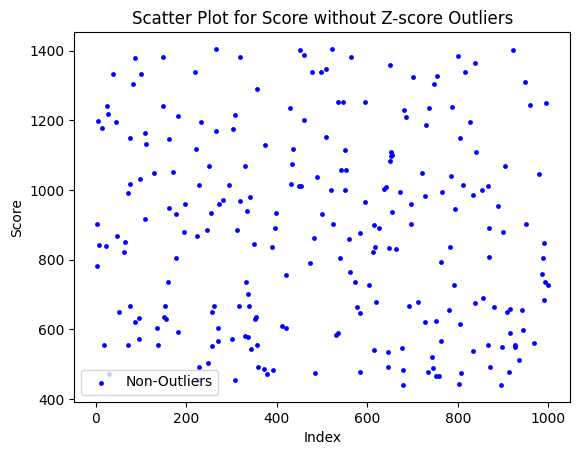

In [60]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'df' from your code

# Columns for Z-score Outlier Detection
z_score_columns = ['WL_Ratio', 'Avg_Deaths', 'Avg_KDR', 'Score']

# Define a threshold for considering a data point as an outlier
threshold = 1

# Remove outliers for each specified column separately
df_no_outliers = df.copy()
for column in z_score_columns:
    outliers = df_no_outliers[abs(zscore(df_no_outliers[column])) > threshold]
    df_no_outliers = df_no_outliers[abs(zscore(df_no_outliers[column])) <= threshold]

   # # Visualize the scatter plot for each column with outliers removed
   # plt.scatter(df_no_outliers.index, df_no_outliers[column], c='blue', label='Non-Outliers', s=6)
   # plt.scatter(outliers.index, outliers[column], c='red', label='Outliers', s=8)
   # plt.title(f'Scatter Plot for {column} with Z-score Outliers Removed')
   # plt.xlabel('Index')
   # plt.ylabel(column)
   # plt.legend()
   # plt.show()

# Visualize the final DataFrame without outliers
for column in z_score_columns:
    plt.scatter(df_no_outliers.index, df_no_outliers[column], c='blue', label='Non-Outliers', s=6)
    plt.title(f'Scatter Plot for {column} without Z-score Outliers')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()




> **Normalization**



In [39]:

# Select columns to normalize
columns_to_normalize = ['Wins', 'Loses', 'WL_Ratio', 'Avg_KDR', 'Score']

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns in the new DataFrame
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Print the normalized DataFrame
print(df)

     Match_id   Wins  Loses  WL_Ratio  Avg_Kills  Avg_Deaths  Avg_Assists  \
0         867  0.250  0.750  0.035714        NaN         NaN          NaN   
1        4591  0.375  0.625  0.062500      231.0       485.0        293.0   
2       15818  0.125  0.875  0.015625        NaN       800.0        530.0   
3        8973  0.875  0.125  0.437500        NaN       639.0         45.0   
4         591  1.000  0.000  1.000000      638.0       249.0         14.0   
...       ...    ...    ...       ...        ...         ...          ...   
997       558  1.000  0.000  1.000000        NaN       754.0         69.0   
998      0828  0.875  0.125  0.437500      410.0       460.0        385.0   
999     50870  1.000  0.000  1.000000      754.0       386.0          7.0   
1000    60170  1.000  0.000  1.000000      754.0       386.0          7.0   
1001    39993  1.000  0.000  1.000000      754.0       386.0          7.0   

       Avg_KDR Device_Played     Score  
0     0.000935       Console      

In [8]:
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Device_Played' column
df['Device_Played_encoded'] = label_encoder.fit_transform(df['Device_Played'])

# Print the DataFrame with the encoded column
print(df[['Device_Played', 'Device_Played_encoded']])

    Device_Played  Device_Played_encoded
0         Console                      0
1              PC                      2
2         Console                      0
3         Console                      0
4          Mobile                      1
..            ...                    ...
995       Console                      0
996        Mobile                      1
997        Mobile                      1
998       Console                      0
999       Console                      0

[1000 rows x 2 columns]




> Data Visualization






> Histogram



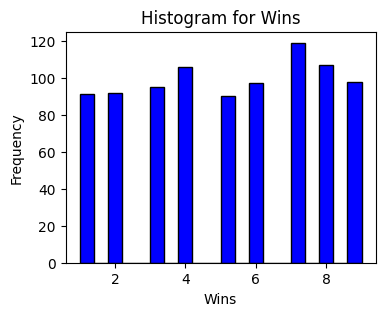

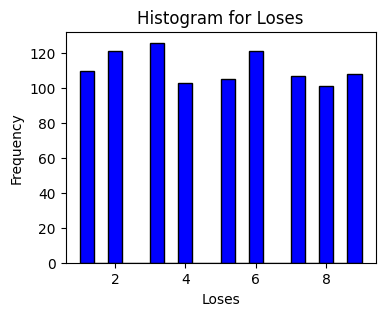

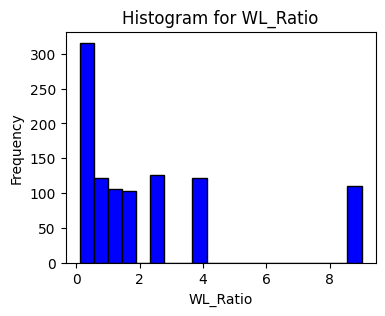

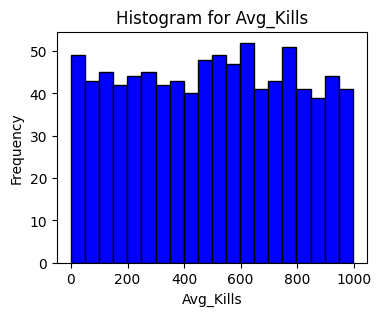

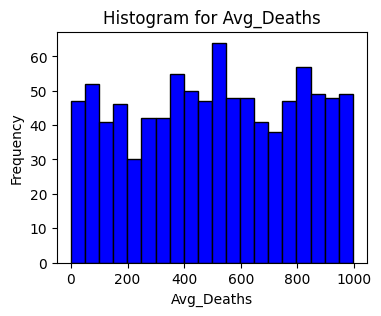

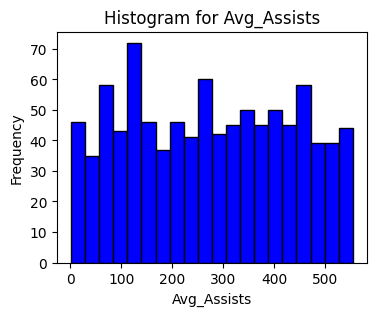

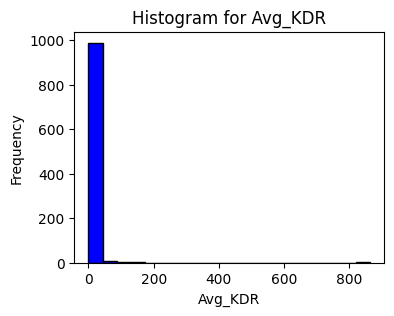

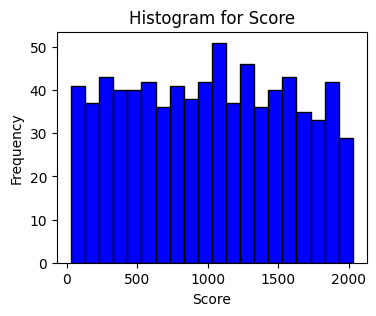

In [15]:

# Function to create histograms for each feature
def create_histograms(dataframe):
    features_to_visualize = ['Wins', 'Loses', 'WL_Ratio', 'Avg_Kills', 'Avg_Deaths', 'Avg_Assists', 'Avg_KDR', 'Score']

    for feature in features_to_visualize:
        plt.figure(figsize=(4, 3))
        plt.hist(dataframe[feature].dropna(), bins=20, color='blue', edgecolor='black')  # Drop NA values
        plt.title(f'Histogram for {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
    match_data = {
        'Match_id': fake.building_number(),
        'Wins': wins,
        'Loses': loses,
        'WL_Ratio': wl_ratio,
        'Avg_Kills': avg_kills,
        'Avg_Deaths': avg_deaths,
        'Avg_Assists': avg_assists,
        'Avg_KDR': avg_kdr,
        'Device_Played': device_played,  # Include the new categorical feature
        'Score': score
    }

    match_data_list.append(match_data)

# Convert data to DataFrame
df = pd.DataFrame(match_data_list)

# Save to CSV
df.to_csv('Data_set.csv', index=False)

# Create histograms for the features
create_histograms(df)


> Scatter Plot



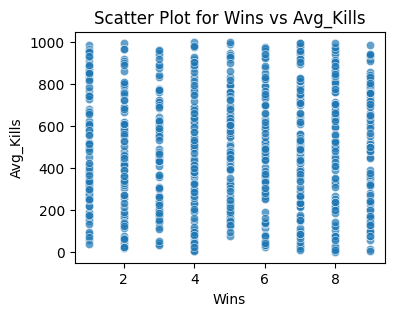

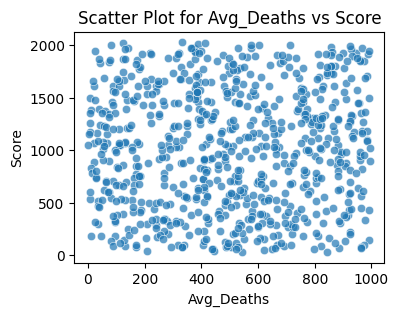

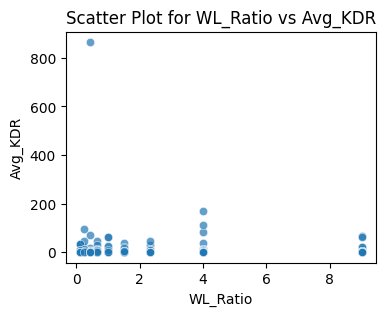

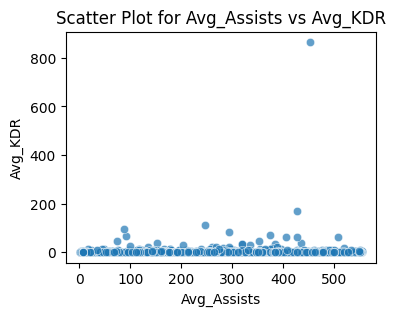

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features
numerical_features = ['Wins', 'Loses', 'WL_Ratio', 'Avg_Kills', 'Avg_Deaths', 'Avg_Assists', 'Avg_KDR', 'Score']

# Scatter plot for selected numerical feature pairs
selected_scatter_pairs = [('Wins', 'Avg_Kills'), ('Avg_Deaths', 'Score'), ('WL_Ratio', 'Avg_KDR'), ('Avg_Assists', 'Avg_KDR')]

# Function to create scatter plots for selected feature pairs
def create_scatter_plots(dataframe, feature_pairs):
    for pair in feature_pairs:
        plt.figure(figsize=(4, 3))
        sns.scatterplot(x=pair[0], y=pair[1], data=dataframe, alpha=0.7)
        plt.title(f'Scatter Plot for {pair[0]} vs {pair[1]}')
        plt.xlabel(pair[0])
        plt.ylabel(pair[1])
        plt.show()

# Create scatter plots for selected feature pairs
create_scatter_plots(df, selected_scatter_pairs)




>





> Line Plot



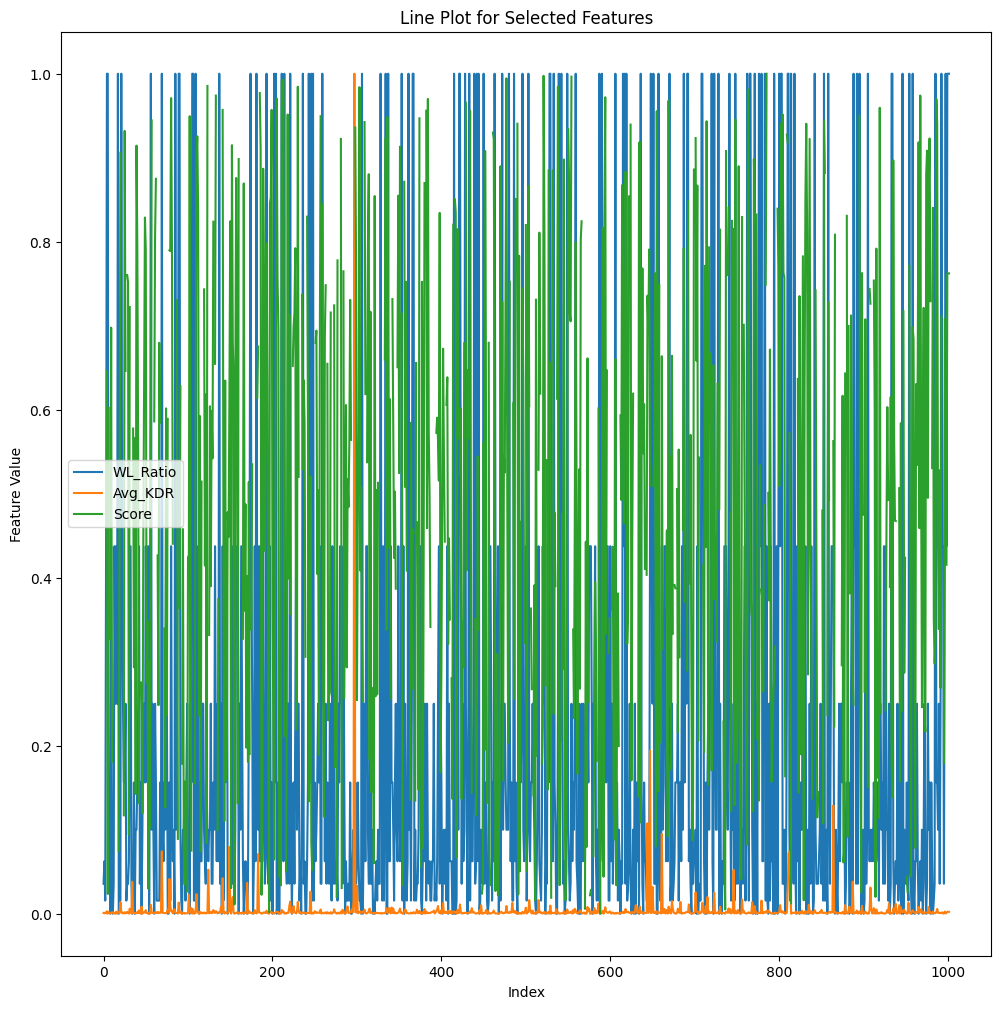

In [42]:

# List of features for line plot
features_for_line_plot = ['WL_Ratio',  'Avg_KDR', 'Score']

# Create a line plot for each feature
plt.figure(figsize=(12, 12))
for feature in features_for_line_plot:
    plt.plot(df.index, df[feature], label=feature)

plt.title('Line Plot for Selected Features')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()



> Histogram




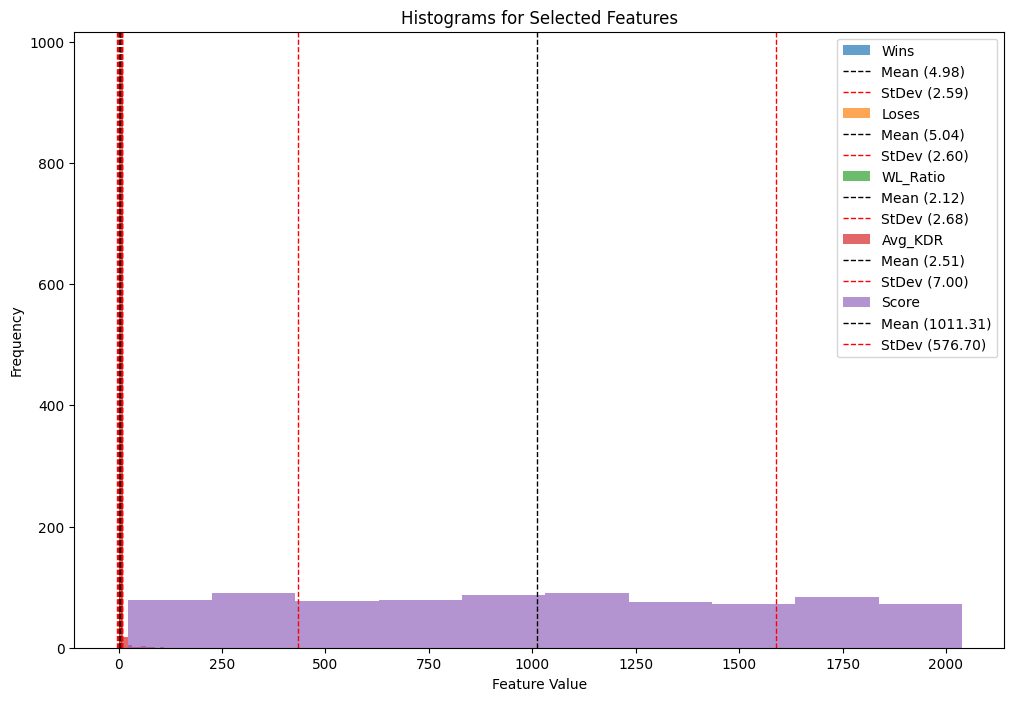

In [15]:
import matplotlib.pyplot as plt

# List of features for histograms
features_for_histogram = ['Wins', 'Loses', 'WL_Ratio', 'Avg_KDR', 'Score']

# Create histograms for each feature
plt.figure(figsize=(12, 8))
for feature in features_for_histogram:
    plt.hist(df[feature], bins=10, alpha=0.7, label=feature)

    # Add mean and standard deviation to the plot
    mean_value = df[feature].mean()
    std_dev = df[feature].std()
    plt.axvline(mean_value, color='k', linestyle='dashed', linewidth=1, label=f'Mean ({mean_value:.2f})')
    plt.axvline(mean_value + std_dev, color='r', linestyle='dashed', linewidth=1, label=f'StDev ({std_dev:.2f})')
    plt.axvline(mean_value - std_dev, color='r', linestyle='dashed', linewidth=1)

plt.title('Histograms for Selected Features')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


<Figure size 1200x800 with 0 Axes>

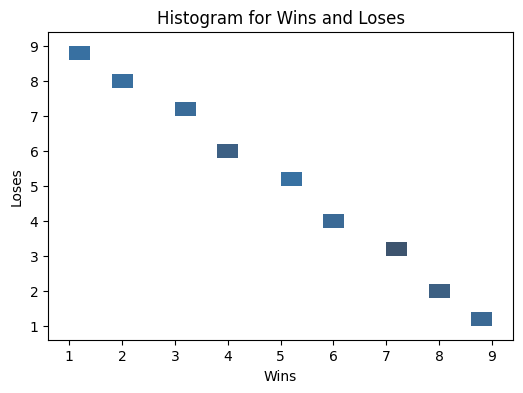

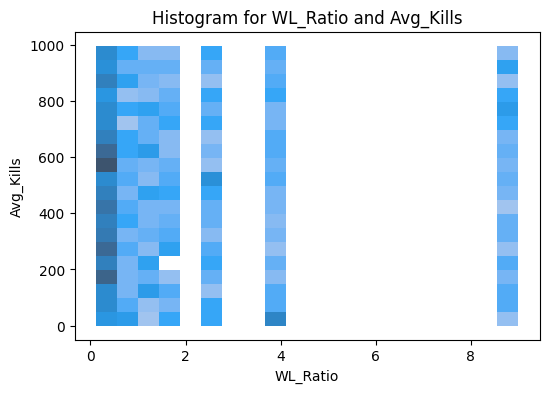

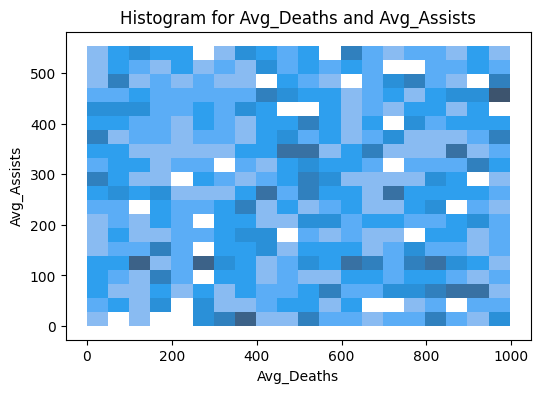

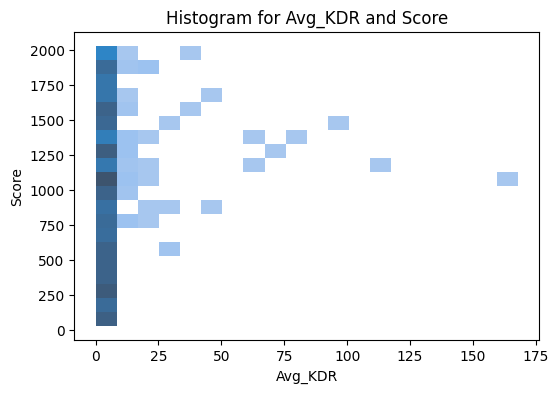

In [32]:

# List of feature pairs for histograms
feature_pairs_for_histogram = [('Wins', 'Loses'), ('WL_Ratio', 'Avg_Kills'), ('Avg_Deaths', 'Avg_Assists'), ('Avg_KDR', 'Score')]

# Create separate histograms for each feature pair
plt.figure(figsize=(12, 8))
for pair in feature_pairs_for_histogram:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=pair[0], y=pair[1], bins=20)
    plt.title(f'Histogram for {pair[0]} and {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()



> Bar Plot




<Figure size 1200x800 with 0 Axes>

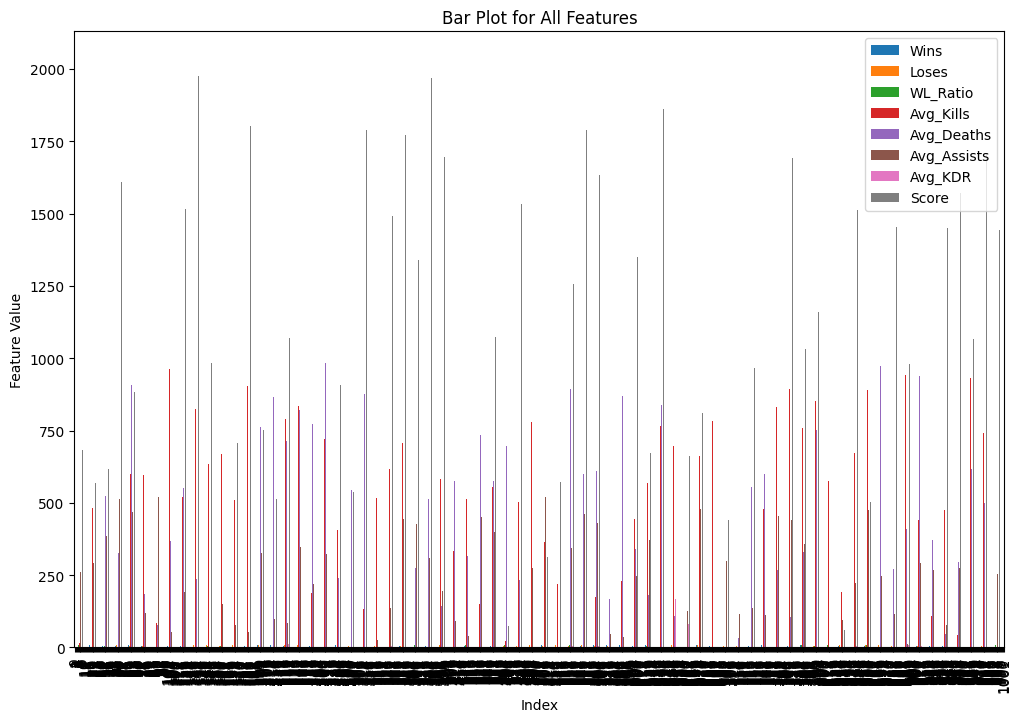

<Figure size 1200x800 with 0 Axes>

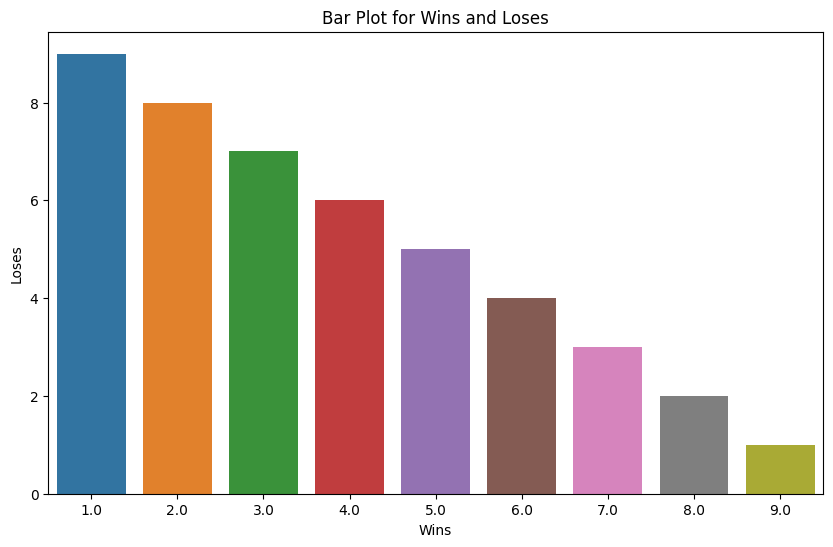

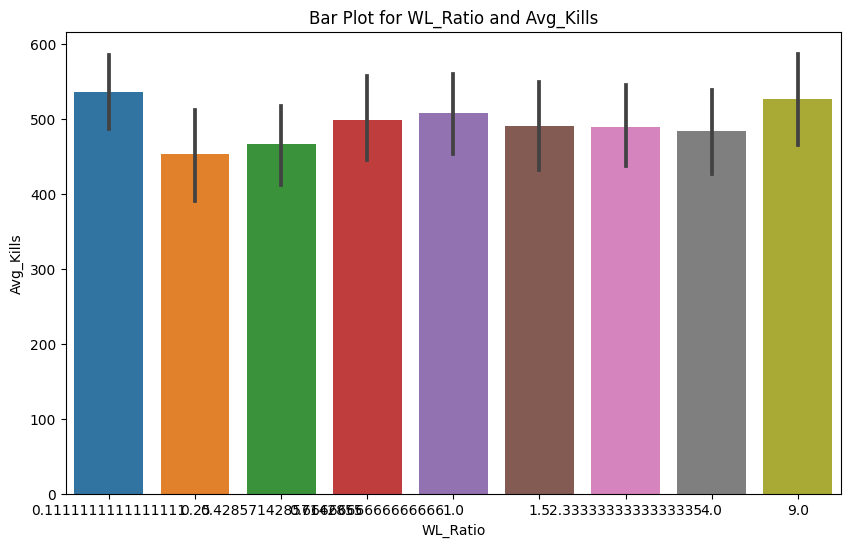

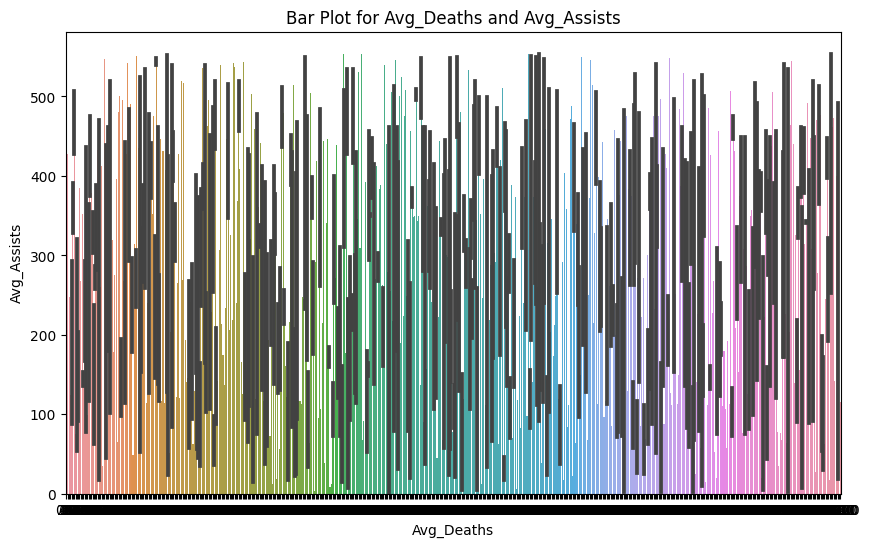

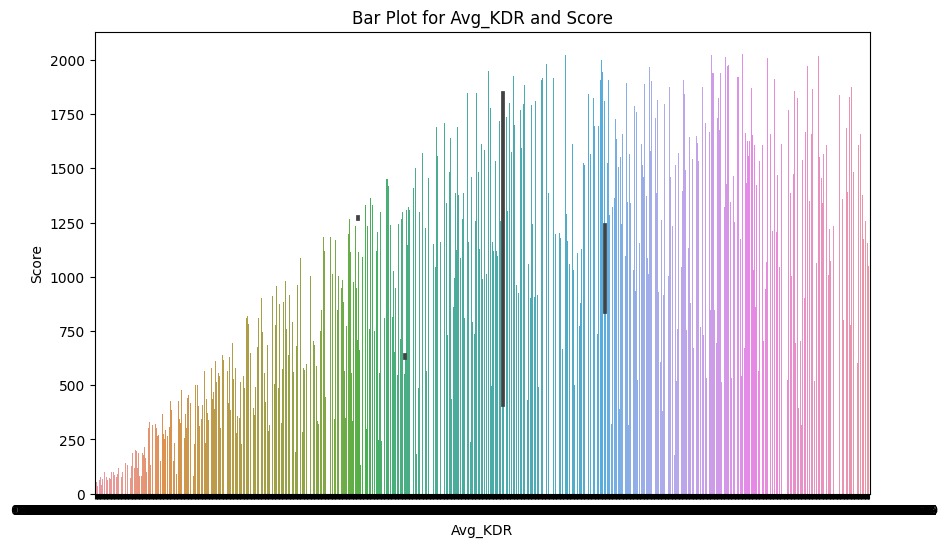

In [33]:

# List of features for bar plots
features_for_bar_plot = ['Wins', 'Loses', 'WL_Ratio', 'Avg_Kills', 'Avg_Deaths', 'Avg_Assists', 'Avg_KDR', 'Score']

# Bar plot for all features at once
plt.figure(figsize=(12, 8))
df[features_for_bar_plot].plot(kind='bar', figsize=(12, 8))
plt.title('Bar Plot for All Features')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend(loc='upper right')
plt.show()

# Bar plots for two comparable features at a time
feature_pairs_for_bar_plot = [('Wins', 'Loses'), ('WL_Ratio', 'Avg_Kills'), ('Avg_Deaths', 'Avg_Assists'), ('Avg_KDR', 'Score')]

plt.figure(figsize=(12, 8))
for pair in feature_pairs_for_bar_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=pair[0], y=pair[1])
    plt.title(f'Bar Plot for {pair[0]} and {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()



> Heat Map



<ipython-input-34-a5bff71eb4e1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


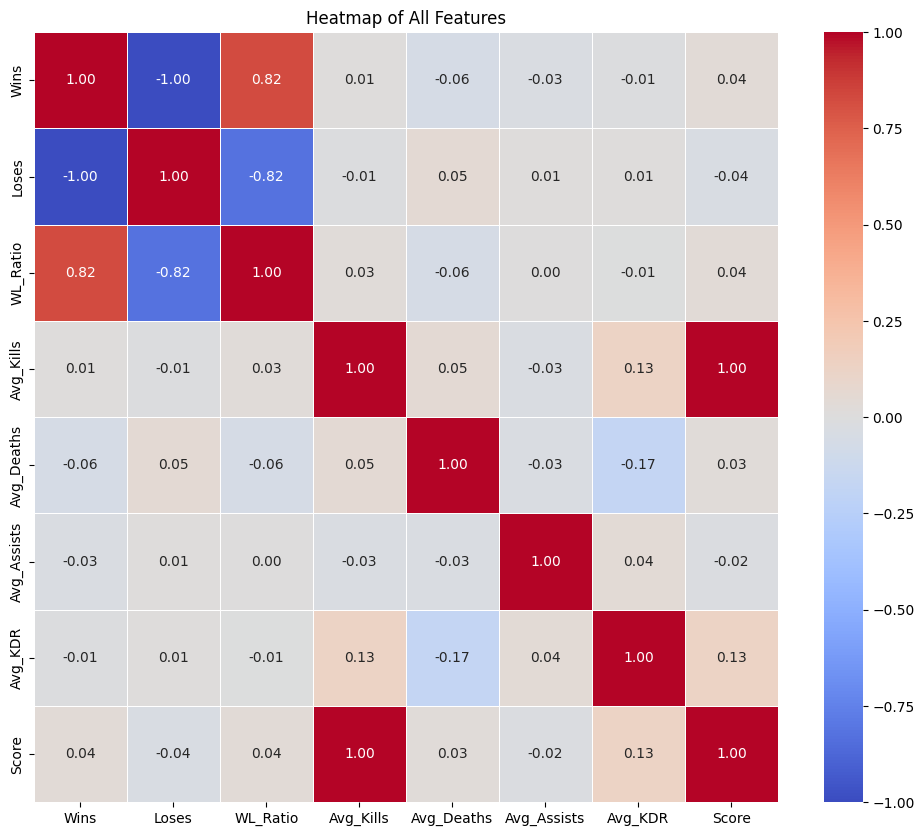

In [34]:

# Create a heatmap for all features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of All Features')
plt.show()



> Pie Plot for Categorical Plotting




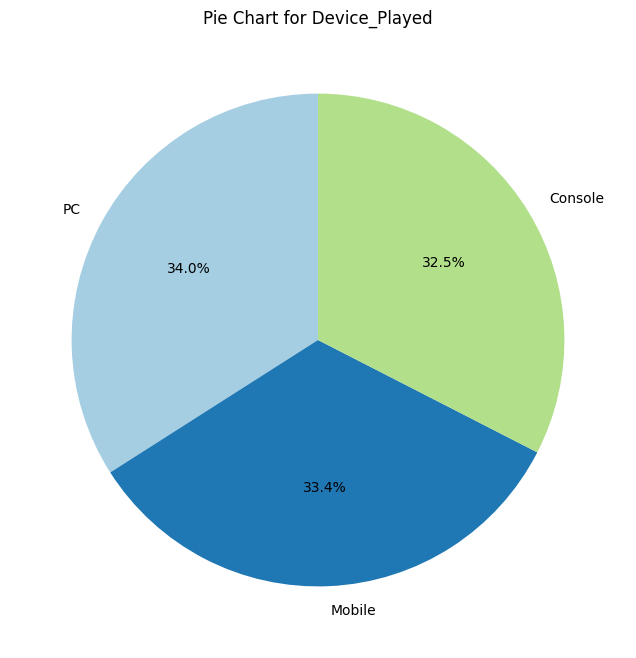

In [36]:
#Categorical feature for the pie chart
categorical_feature = 'Device_Played'

# Count the occurrences of each category
category_counts = df[categorical_feature].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f'Pie Chart for {categorical_feature}')
plt.show()



> Area Plot




<Figure size 1200x800 with 0 Axes>

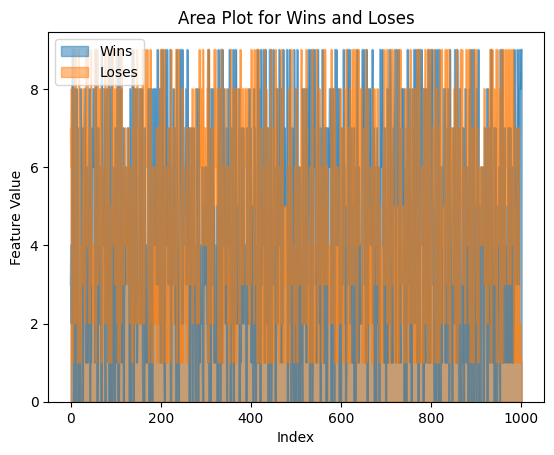

In [37]:

# Features for the area plot
features_for_area_plot = ['Wins', 'Loses']

# Create an area plot for all features
plt.figure(figsize=(12, 8))
df[features_for_area_plot].plot(kind='area', stacked=False)
plt.title('Area Plot for Wins and Loses')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()



> Pair Plot




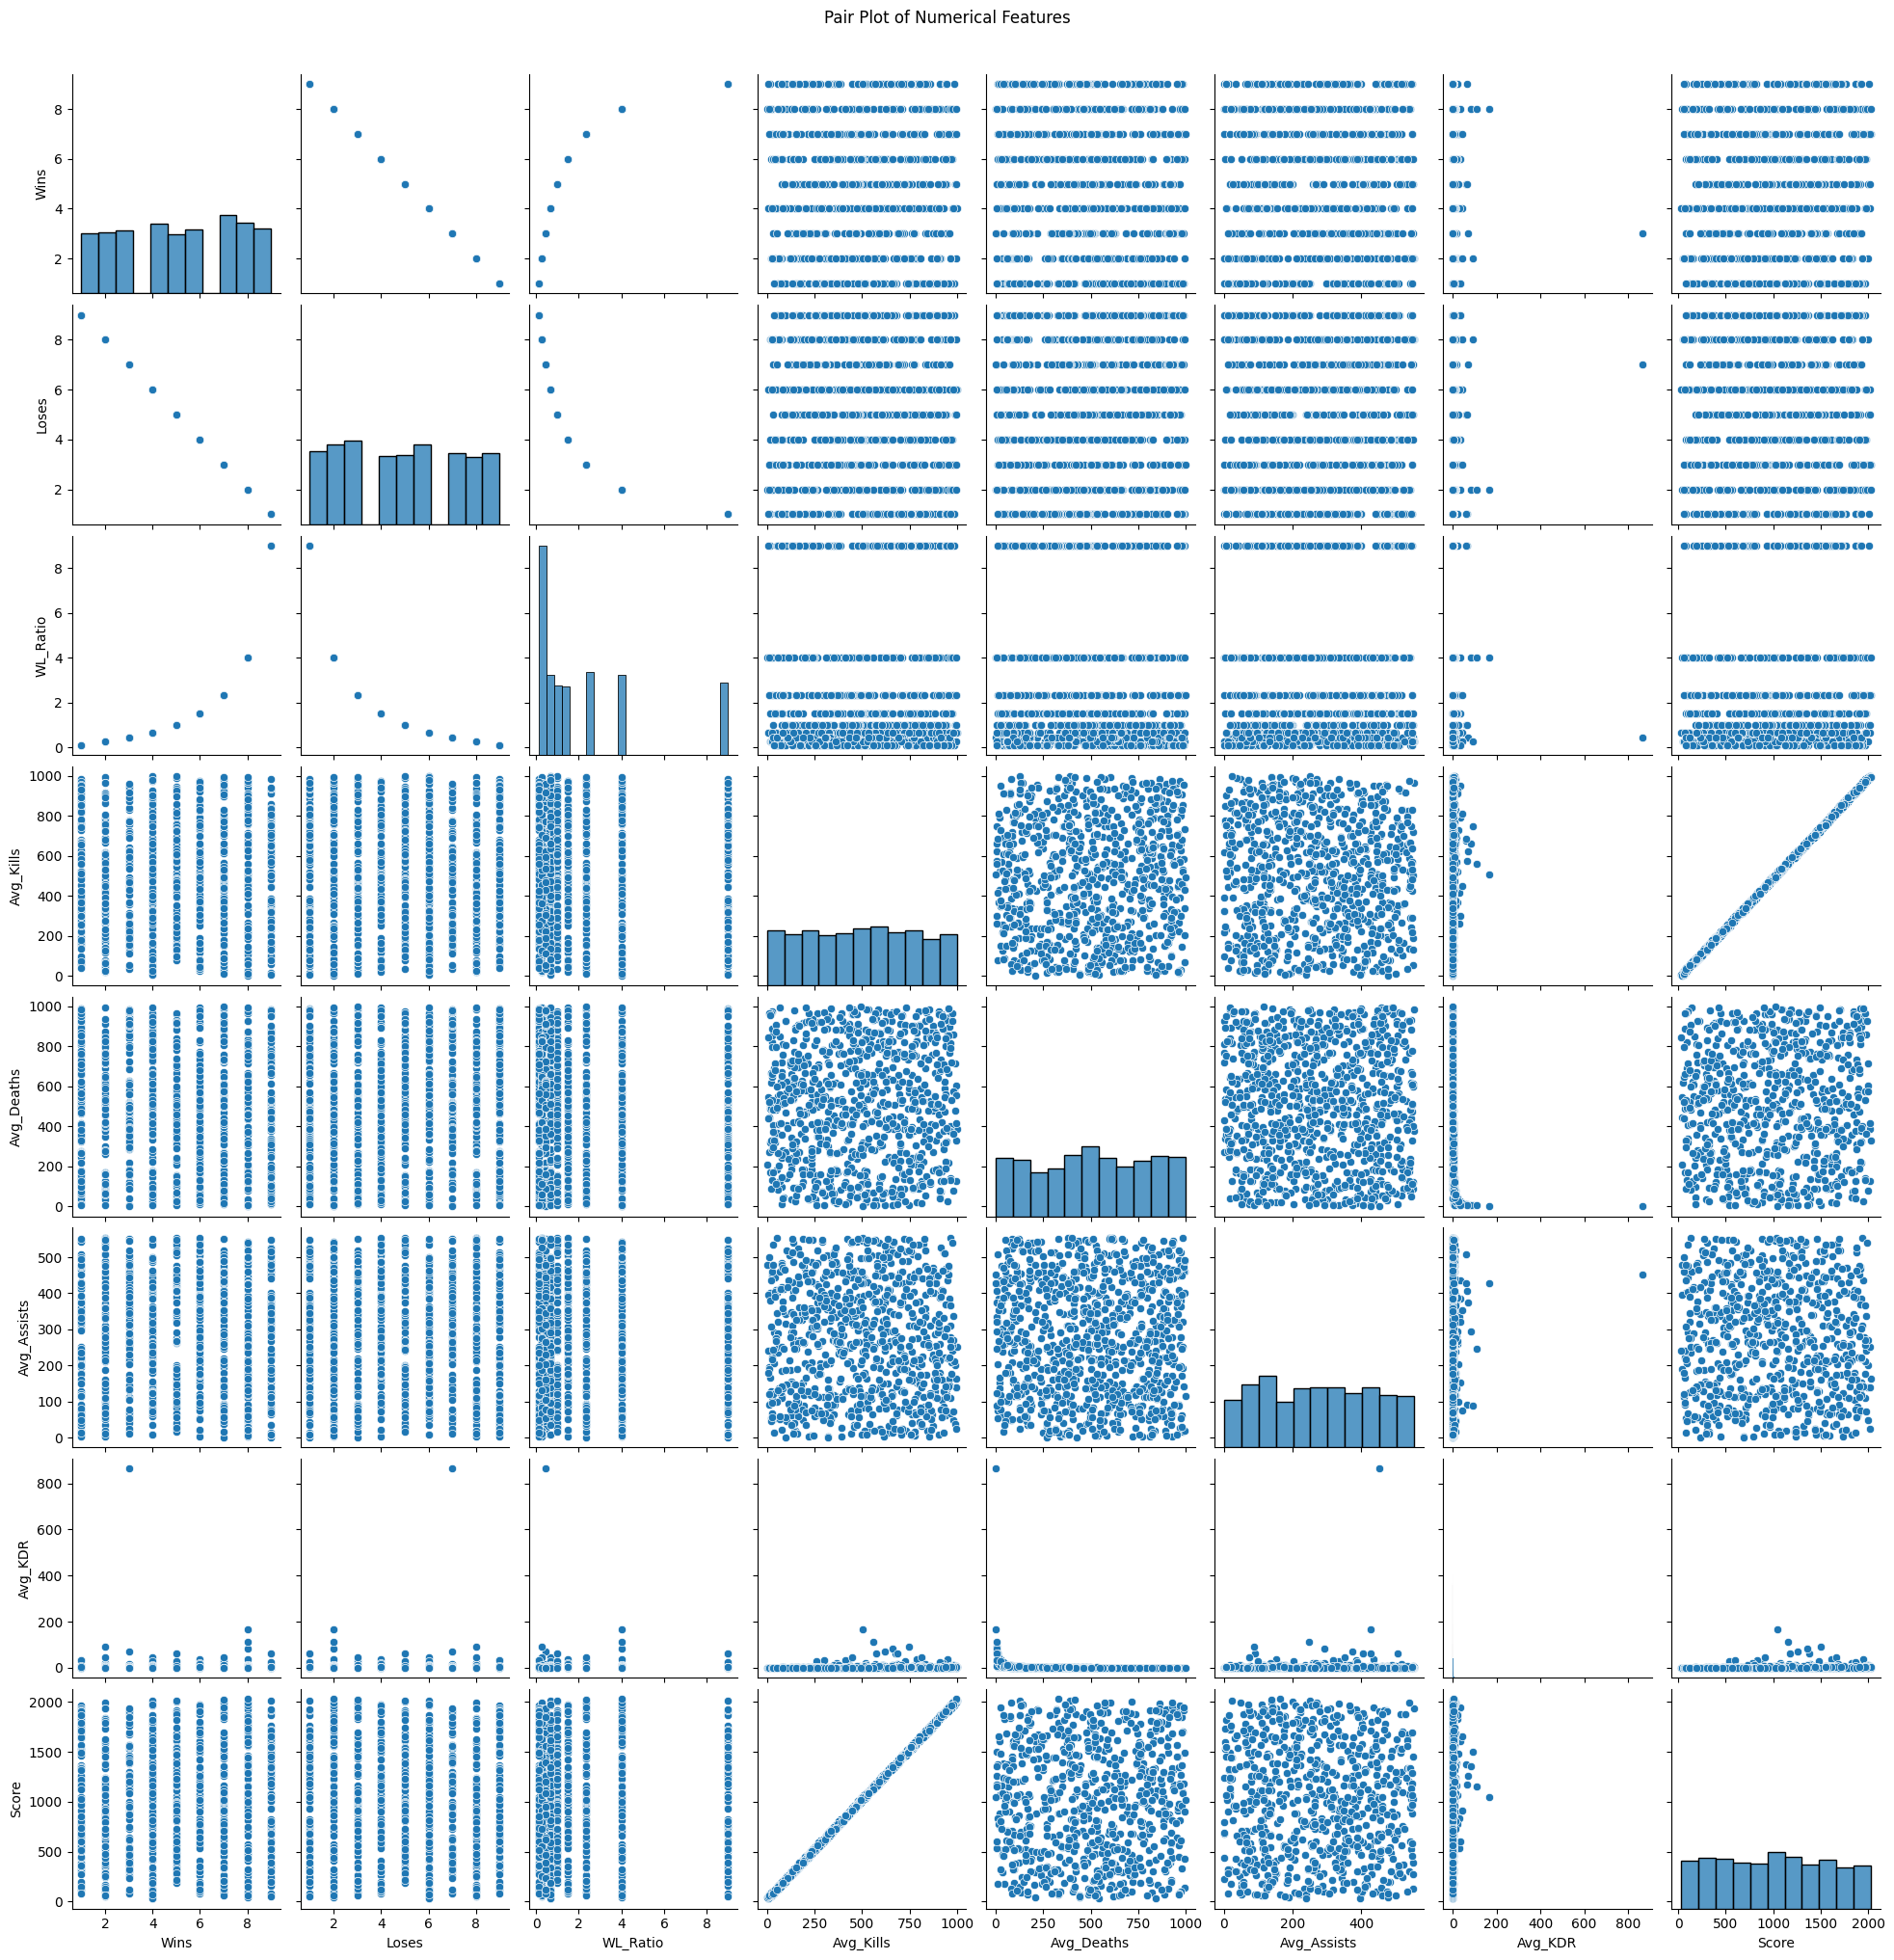

In [38]:

# List of numerical features
numerical_features = ['Wins', 'Loses', 'WL_Ratio', 'Avg_Kills', 'Avg_Deaths', 'Avg_Assists', 'Avg_KDR', 'Score']

# Create a pair plot
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()